# Police Recorded Crime Trends

## Task Overview
To make a report about trends and pattern of crimes recorded by the police in West Yorkshire over six months between April and September 2020. To find how did counts of the different types of crime change over the 6 month period ? Are the patterns as you would expect? highlight any unexpected or unusual features of the data. Is there anything to suggest that their data are incomplete, incorrect, etc.


### Import Packages

In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load and Combine the Data

The data contains the crime recorded by police in several csv files with a folder for each Month from apr to sep 2020.Within each folder, there is a CSV file we will concatenate these into one combined data and look at the data.

In [ ]:
target_dir = r"C:\Users\LENOVO\Documents\Combined_data"

# List all CSV files in the target directory
csv_files = [f for f in os.listdir(target_dir) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
df_list = []

# Iterate through each CSV file and read it into a DataFrame
for file in csv_files:
    file_path = os.path.join(target_dir, file)
    df = pd.read_csv(file_path)
    df_list.append(df)
combined_df = pd.concat([df_apr,df_may,df_jun,df_jul,df_aug,df_sep],ignore_index=True)

### Exploratory Data Analysis

In [71]:
#Display first 5 rows of the dataframe
combined_df.head(5)

,Unnamed: 0,Crime ID,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Reported by
0,0,NaN,2020-04,West Yorkshire Police,-1.550626,53.597400,On or near Swithen Hill,E01007359,Barnsley 005C,Anti-social behaviour,NaN,NaN,NaN
1,1,5ea1997471c9de64fcfcf1145cadfff71ba37f21668d25...,2020-04,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Burglary,Investigation complete; no suspect identified,NaN,NaN
2,2,NaN,2020-04,West Yorkshire Police,-1.862742,53.940068,On or near Smithy Greaves,E01010646,Bradford 001A,Anti-social behaviour,NaN,NaN,NaN
3,3,0d8ee70dbd3096b4d07059d7f7c310fbf5de9cb7d44c31...,2020-04,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Shoplifting,Investigation complete; no suspect identified,NaN,NaN
4,4,cb4709a03d98dc63ba4c1771171bc7a9353097f5851d80...,2020-04,West Yorkshire Police,-1.882481,53.924936,On or near Moorside Lane,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,NaN


In [74]:
# shape of the dataframe 
combined_df.shape

(158898, 13)

In [72]:
# Concise summary of data frame 
combined_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158898 entries, 0 to 158897
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             158898 non-null  int64  
 1   Crime ID               129209 non-null  object 
 2   Month                  156898 non-null  object 
 3   Falls within           127620 non-null  object 
 4   Longitude              153411 non-null  float64
 5   Latitude               153411 non-null  float64
 6   Location               156898 non-null  object 
 7   LSOA code              153410 non-null  object 
 8   LSOA name              153410 non-null  object 
 9   Crime type             156898 non-null  object 
 10  Last outcome category  127564 non-null  object 
 11  Context                0 non-null       float64
 12  Reported by            135113 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 15.8+ MB


In [73]:
# checking summary statistics for numerical columns
combined_df.describe()

,Unnamed: 0,Longitude,Latitude,Context
count,158898.000000,153411.000000,153411.000000,0.0
mean,13373.991095,-1.646667,53.714016,NaN
std,7862.581902,1.624770,2.216039,NaN
min,0.000000,-99.342253,-96.415042,NaN
25%,6620.000000,-1.778616,53.704736,NaN
50%,13241.000000,-1.648774,53.774150,NaN
75%,19862.000000,-1.526993,53.808963,NaN
max,29432.000000,98.150160,99.528496,NaN


From summary statistics we can see longitude and latitude is symmetric with different scales, which we will standarised later.

In [75]:
# Checking for data types
combined_df.dtypes

Unnamed: 0                 int64
Crime ID                  object
Month                     object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
Reported by               object
dtype: object

Most of the features shown object datatype, except longitude, latitude and Context.We need to convert Month into datatime and Falls within, LSOA name, Crime type,Last outcome category into categorical.

In [76]:
# Checking missing values percentage in dataset 
missing_percent = combined_df.isnull().mean() * 100
missing_percent

Unnamed: 0                 0.000000
Crime ID                  18.684313
Month                      1.258669
Falls within              19.684326
Longitude                  3.453159
Latitude                   3.453159
Location                   1.258669
LSOA code                  3.453788
LSOA name                  3.453788
Crime type                 1.258669
Last outcome category     19.719569
Context                  100.000000
Reported by               14.968722
dtype: float64

Since 18% of Crime ID is missing and Crime ID is unique therefore we need to drop null value while performing data cleaning, also 'Falls within' is majorly for west yorkshire police so we can fill blank value with same.

### Data Cleaning 

In [79]:
#Changing data types 
combined_df[['Falls within','Location','LSOA name','Crime type','Last outcome category']]=combined_df[['Falls within','Location','LSOA name','Crime type','Last outcome category']].astype('category')

In [88]:
combined_df['Month'] = pd.to_datetime(combined_df['Month'])

In [13]:
# checking for duplicates 
duplicate_rows = combined_df.duplicated().sum()
duplicate_rows

1

In [78]:
# dropping duplicates
combined_df.drop_duplicates(inplace=True)

In [83]:
# dropping na from Crime Id, latitude and longitude
combined_df.dropna(subset=['Crime ID','Longitude','Latitude'],inplace=True)

Dropped the null values above in latitude and longitude as crime location is unique, and it is only 4%, we can impute them aswell, but dropping them will drop the null values in LSOA code and LSOA name which will make data less imbalance.

In [85]:
combined_df.isnull().mean()*100

Unnamed: 0                 0.000000
Crime ID                   0.000000
Month                      0.000000
Falls within              18.327705
Longitude                  0.000000
Latitude                   0.000000
Location                   0.000000
LSOA code                  0.000804
LSOA name                  0.000804
Crime type                 0.000000
Last outcome category      0.000000
Context                  100.000000
Reported by               14.490272
dtype: float64

In [146]:
# Dropping context, Reported by and Falls within by column
combined_df.drop(['Context','Reported by','Falls within'],axis=1,inplace=True)

As Context column is 100% null, Falls within and Reported by is in west yorkshire police region only so not adding any additional information to data, if want we can keep one and impute the values with west yorkshire police.

### Data Visualisation 

Plotting distribution of crime by month from april to september

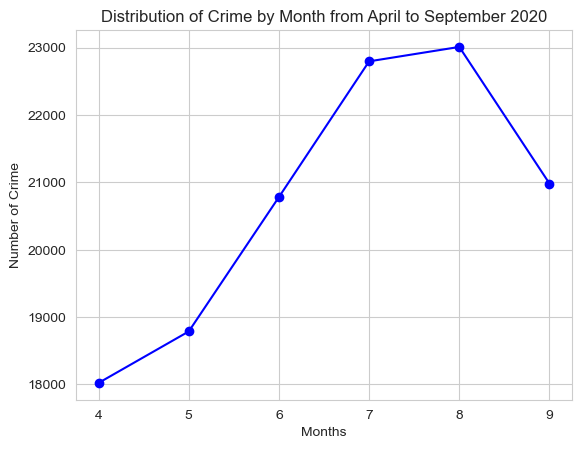

In [102]:
# extracting month from each month date 
combined_df['month'] = combined_df['Month'].dt.month

#finding count of crimes in each month
monthly_crime = combined_df['month'].value_counts().sort_index()

#plt.figure(figsize=(12, 6))
plt.plot(monthly_crime.index, monthly_crime.values, marker='o', linestyle='-', color='b')
plt.title('Distribution of Crime by Month from April to September 2020')
plt.xlabel('Months')
plt.ylabel('Number of Crime')
plt.grid(True)
plt.show()

From above plot we can see the crime rate is less in April when the first lockdown started in UK for COVID-19 but soon started to rise again as the lockdown opens. At the beginning of this quarter (July & Aug months) crime was rising back to normal levels, but in September started to see a fall again due to COVID -19 surge again.

In [100]:
# Percentage of each LSOA name in crime 
combined_df['LSOA name'].value_counts(normalize=True) * 100

Leeds 111B         1.073332
Calderdale 008E    0.809622
Bradford 039G      0.577268
Wakefield 017D     0.528224
Kirklees 029D      0.498476
                     ...   
Hambleton 004C     0.000000
Harrogate 003C     0.000000
Selby 009B         0.000000
Selby 009A         0.000000
Hambleton 005A     0.000000
Name: LSOA name, Length: 1418, dtype: float64

Above we can see 1418 unique LSOA name contribute to crime thetefore we will see top 10 LSOA name.For better visualisation we will spilt the LSOA name into LSOA city to see which city contribute most to the crime.

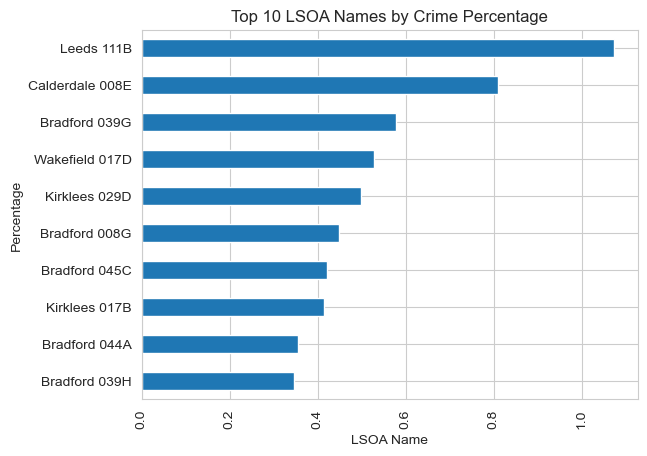

In [101]:
top_LSOA_name = (combined_df['LSOA name'].value_counts(normalize=True) * 100).head(10).sort_values()

top_LSOA_name.plot(kind='barh')
plt.title('Top 10 LSOA Names by Crime Percentage')
plt.xlabel('LSOA Name')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

In [107]:
# Splitting the LSOA name column with space demiliter to form new column LSOA city 
split_column = combined_df['LSOA name'].str.split(' ', n=1, expand=True)
combined_df['LSOA city'] = split_column[0]
combined_df['LSOA city']=combined_df['LSOA city'].astype('category')
combined_df['LSOA city'].value_counts()

Leeds         43399
Bradford      32594
Kirklees      19696
Wakefield     17968
Calderdale    10674
Harrogate        22
Barnsley          8
Oldham            8
Selby             5
Craven            3
Rochdale          1
Rossendale        1
Name: LSOA city, dtype: int64

As we can see above, Leeds is having highest crime and Rochdale, Rossendale having lowest.
Leeds, bradford kirklees, wakefield and calderdale have more than 80% of crime.
Harrogate, Barnsley, oldham, Rochdale and Rossendale seems to be safest place to live in.well apart top 5 LSON city others not covered inder west yorkshire police they are covered under crime police such as South yorkshire or Oldham in Greater manchester. That will provide better figures for crimes in those city. 

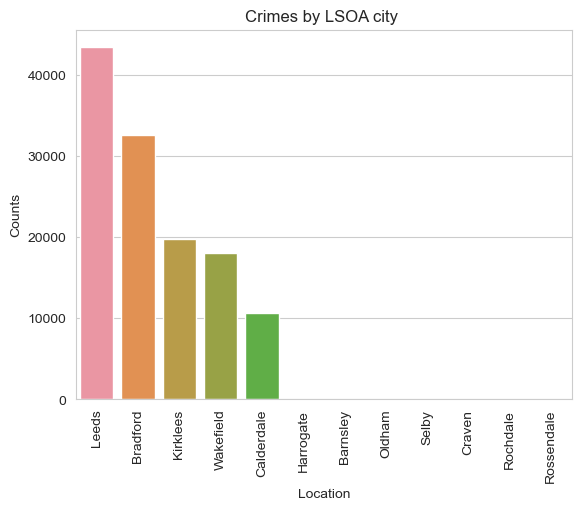

In [113]:
#plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='LSOA city', order=combined_df['LSOA city'].value_counts().index[:20])
plt.title('Crimes by LSOA city ')
plt.xlabel('Location')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

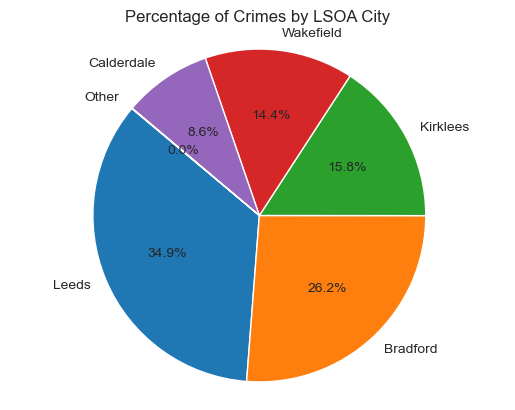

In [120]:
# Calculate the distribution and percentage of crimes by city
city_distribution = combined_df['LSOA city'].value_counts()
city_percentage = city_distribution / city_distribution.sum() * 100

# Aggregating Cities with less than 1% of total crimes into 'Other' to see the % crime contribution.
threshold = 1 
# Split cities into large and small based on the threshold
small_cities = city_percentage[city_percentage < threshold]
large_cities = city_percentage[city_percentage >= threshold]

# Aggregate small cities into 'Other' category using pd.concat
city_percentage_aggregated = pd.concat([large_cities, pd.Series(small_cities.sum(), index=['Other'])])

#plt.figure(figsize=(10, 8))
plt.pie(city_percentage_aggregated, labels=city_percentage_aggregated.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Crimes by LSOA City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [117]:
# Calculate the distribution of different crime types
crime_type_distribution = combined_df['Crime type'].value_counts()

# Calculate the percentage for each crime type
crime_type_percentage = crime_type_distribution / crime_type_distribution.sum() * 100

# Combine the counts and percentages into a single DataFrame
crime_type_stats = pd.DataFrame({
    'Count': crime_type_distribution,
    'Percentage': crime_type_percentage
})
crime_type_stats

,Count,Percentage
Violence and sexual offences,56173,45.162406
Public order,17507,14.075414
Criminal damage and arson,12765,10.262904
Other theft,8116,6.525165
Burglary,6951,5.588519
Vehicle crime,6287,5.054671
Shoplifting,4697,3.776331
Drugs,4309,3.464383
Other crime,3489,2.805113
Robbery,1115,0.896446


Violence and sexual offences, public order, Criminal damage and Arson contribute nearly 70% of crime. And Anti-social behaviour contribute 0% which is unusual looking at the numbers available on government official site.

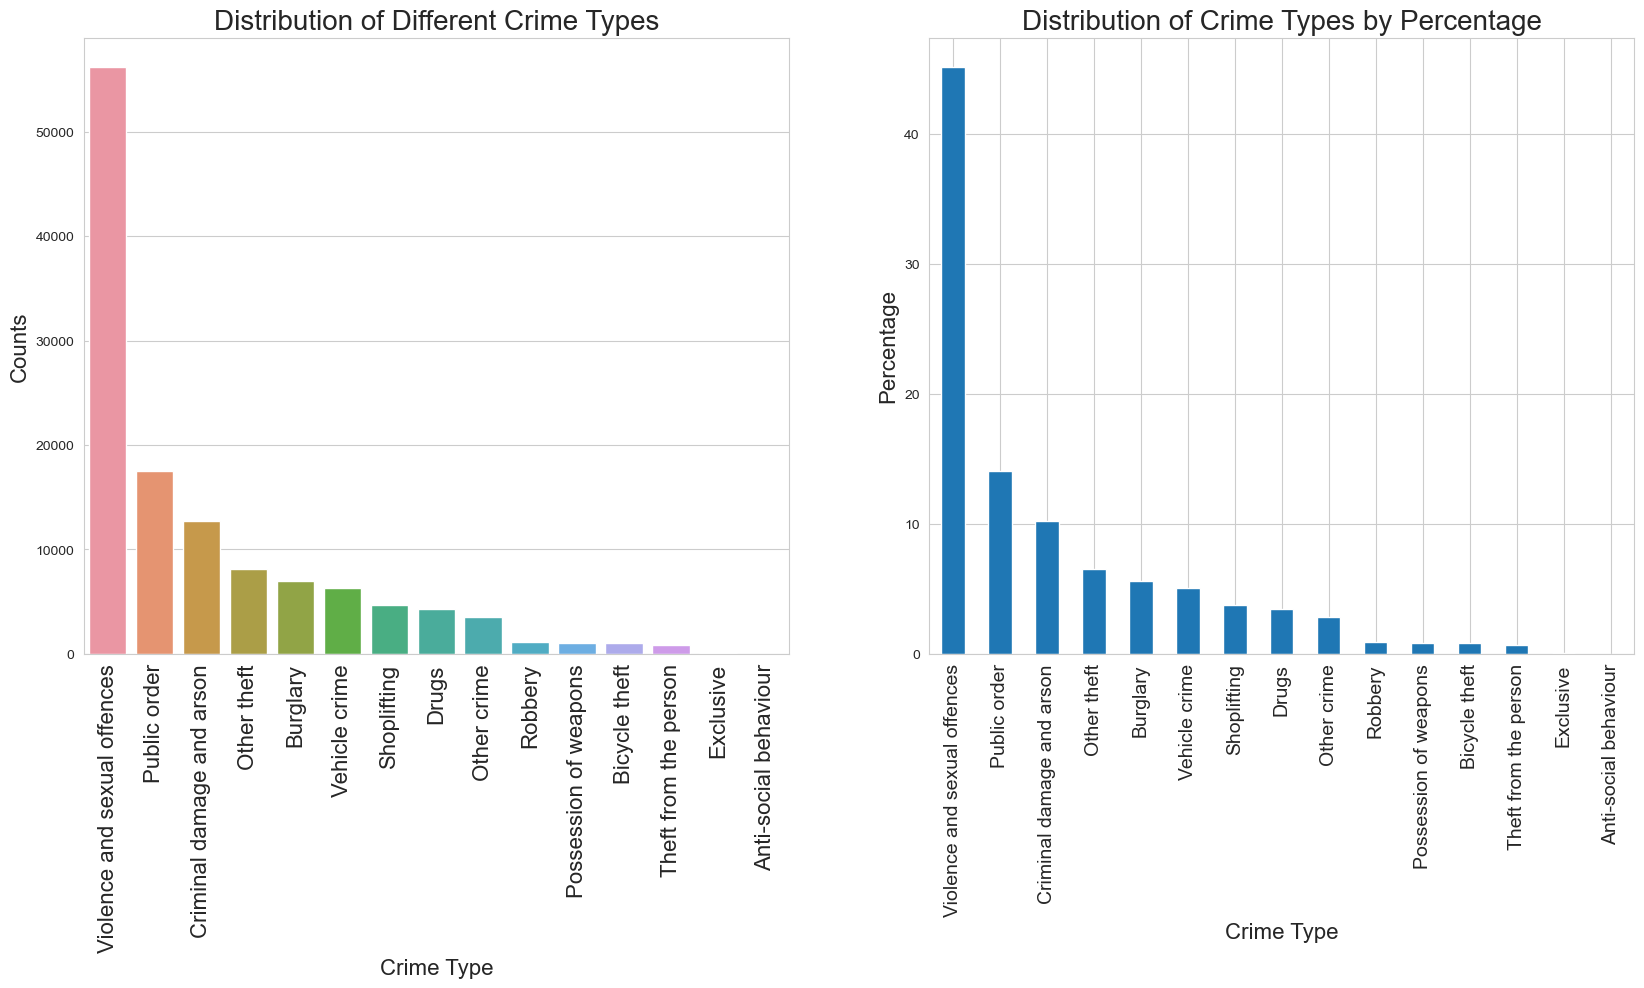

In [121]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))  # 1 row, 2 columns

# First subplot: Count plot
sns.countplot(data=combined_df, x='Crime type', order=combined_df['Crime type'].value_counts().index, ax=axes[0])
axes[0].set_title('Distribution of Different Crime Types',fontsize=20)
axes[0].set_xlabel('Crime Type',fontsize=16)
axes[0].set_ylabel('Counts',fontsize=16)
axes[0].tick_params(axis='x', rotation=90, labelsize=16)

# Second subplot: Bar plot for percentages
crime_type_stats['Percentage'].plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribution of Crime Types by Percentage',fontsize=20)
axes[1].set_xlabel('Crime Type', fontsize=16)
axes[1].set_ylabel('Percentage',fontsize=16)
axes[1].tick_params(axis='x', rotation=90,labelsize=14)

plt.show()


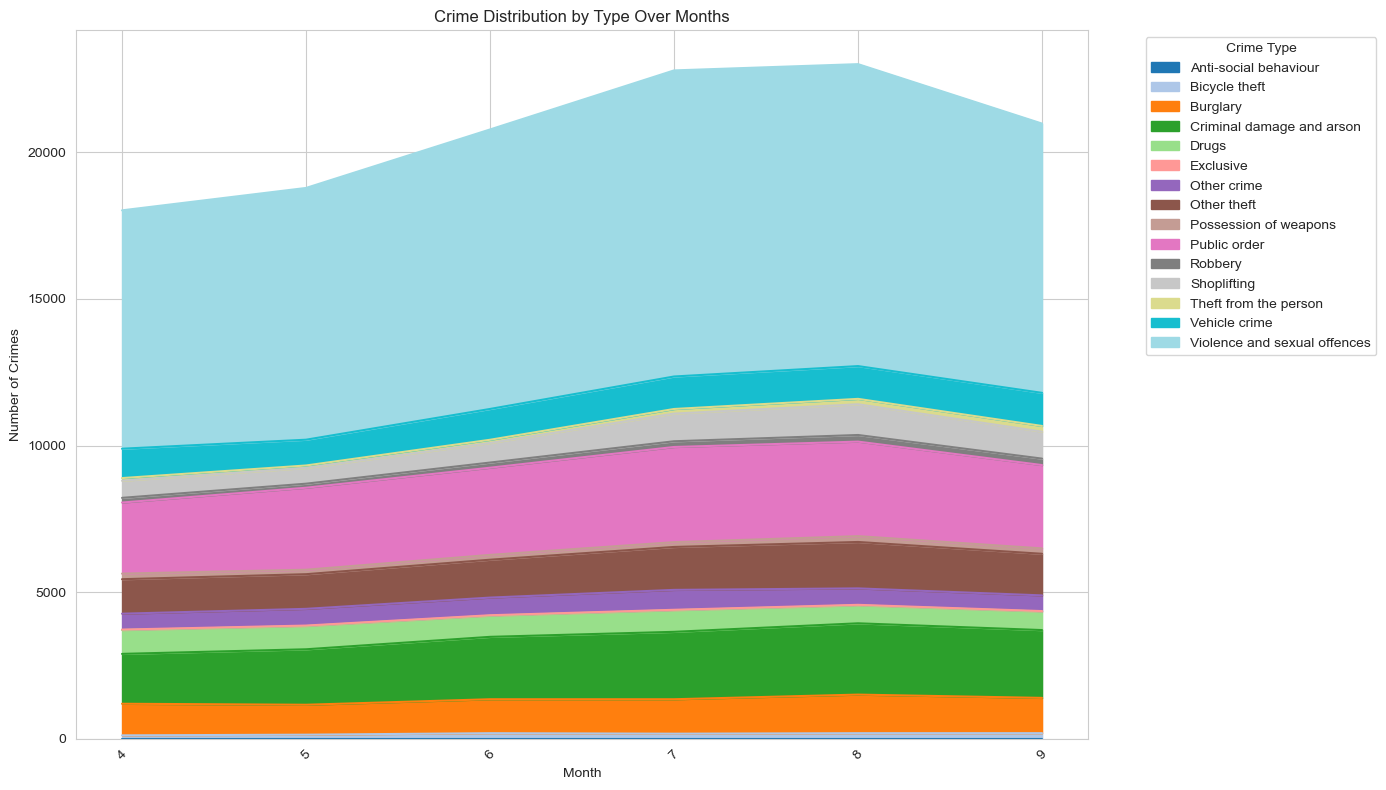

In [123]:
# Crime Distribution by Type Over Months
monthly_crime_type = combined_df.groupby(['month', 'Crime type']).size().unstack(fill_value=0)

monthly_crime_type.plot(kind='area', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Crime Distribution by Type Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The trends of crime type over month is same, increasing and then decresing, with Violence and sexual offences, public order, Criminal damage and Arson have most crime no.

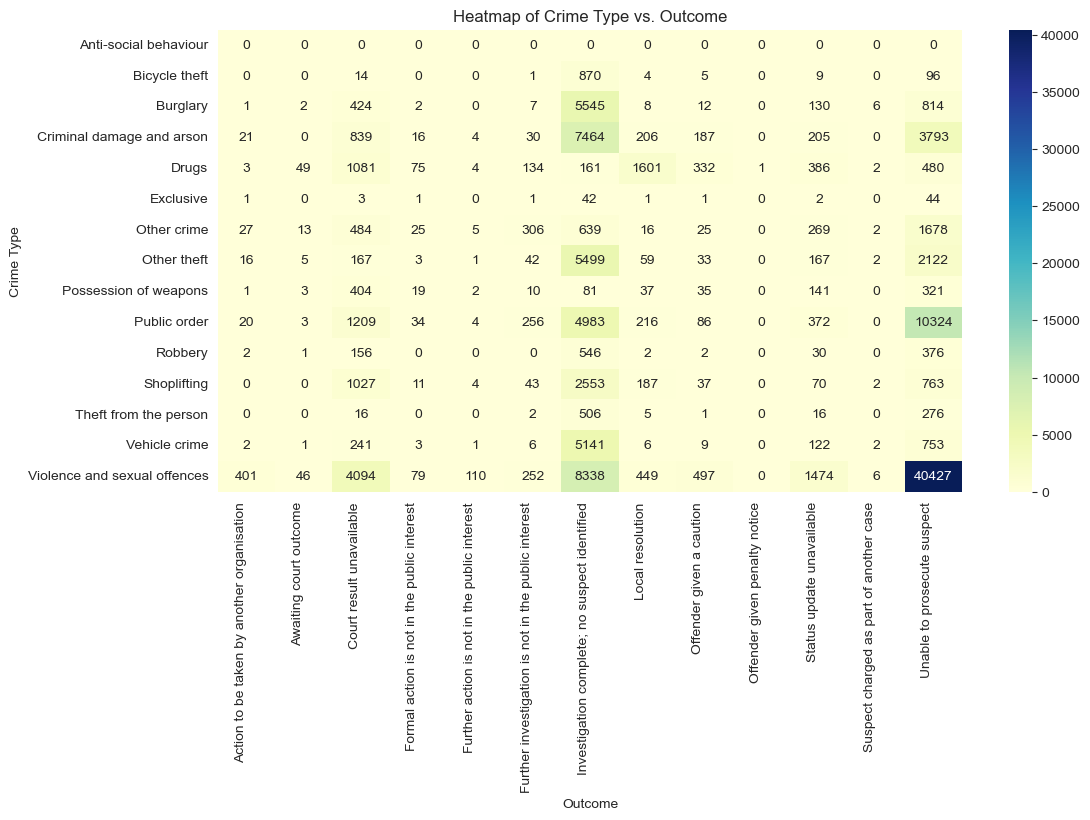

In [133]:
# Crime type vs Last Outcome 
pivot_table = combined_df.pivot_table(index='Crime type', columns='Last outcome category', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Crime Type vs. Outcome')
plt.xlabel('Outcome')
plt.ylabel('Crime Type')
plt.xticks(rotation=90, ha='right')
plt.show()

Large no. of Violence and sexual offences,Public order,criminal damage are unable to prosecute suspect which is not dettering the crime.This need to be looked after for reduction of large chunk of cases.

We will see how can make the model which can predict the future crime and accordingly we can take action to reduce the no. of crime.We will use Random forest and logistic regression for classification of target variable crime type.

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

### Data Preprocessing & Feature Selection 

In [135]:
#Standardization
numerical_features = ['Longitude', 'Latitude']
scaler = StandardScaler()
combined_df[numerical_features] = scaler.fit_transform(combined_df[numerical_features])

In [136]:
#data transformation
combined_df = pd.get_dummies(combined_df, columns=['LSOA city', 'month'])

In [148]:
X = combined_df.drop(columns=['Unnamed: 0','Crime ID', 'Month','Location','LSOA code','LSOA name','Crime type','Last outcome category'])


In [149]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(combined_df['Crime type'])

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Modelling 

In [151]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [152]:
y_pred_rf = model.predict(X_test)

In [155]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f' Random Forest Accuracy: {accuracy_rf}')

# Calculate overall precision, recall, and F1-score
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f'Overall Precision: {precision}')
print(f'Overall Recall: {recall}')
print(f'Overall F1-Score: {f1}')

 Random Forest Accuracy: 0.4611673902556681
Overall Precision: 0.4119422116687156
Overall Recall: 0.4611673902556681
Overall F1-Score: 0.41570970437025306


In [154]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')

# Calculate overall precision, recall, and F1-score
precision = precision_score(y_test, y_pred_logreg, average='weighted')
recall = recall_score(y_test, y_pred_logreg, average='weighted')
f1 = f1_score(y_test, y_pred_logreg, average='weighted')

print(f'Overall Precision: {precision}')
print(f'Overall Recall: {recall}')
print(f'Overall F1-Score: {f1}')



Logistic Regression Accuracy: 0.44963016562148256
Overall Precision: 0.2676896882021503
Overall Recall: 0.44963016562148256
Overall F1-Score: 0.27907792863686415


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


While both model have almost same accuracy, but random forest have better recall and precsion.we need to check other models as well for better performance of our model.